# Employee Attrition Prediction  


## Introduction  
Employee attrition means employees leave or resign from the company.  

To every company, human is always the biggest asset. It is really important to understand whether employees will resign the company due to dissatisfying working environment, working culture, carear development, ect. When employees leave the company unexpectedly, companies need to spend big amount of time searching, hiring, and training new substitute employees. Furthermore, the substitute employees still need to take some time to bring the profit to the organization.

## Mission & Goal
As a data scentist working in HR department, I am asked to build a model to predict possible resignation based on the given dataset.  
The outcome of model should include the following:
- Model is capable of forseeing the possible resignation with high accuracy.
- Provide a valuable insight to organization which factors are the significant driving forces contributing employee attrition. This will be used to conduct the certain action within organization for improvement.  

## Analysis flow
- Import libraries
- Inspect the dataset and visualize the dataset
  - Visualize the relationship between features and Attrition
- Model Development
- Model comparison
- Optimize model performance

### Import libraries

In [1]:
import pandas as pd  # Data preparation and manipulation
import numpy as np  # Data preparation and manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced visualization tooling
import plotly.express as px  # Interactive visualization tooling
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

C:\Users\nanya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


EmployeeNumber is not a good feature to predict attrition

### Inspect the dataset and visualize the dataset
This step is to have initial understaning about dataset and search some insights for model training later on

In [3]:
df.info()  # Check if data missing and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

No data missing found

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [6]:
df['Attrition'] = df['Attrition'].astype('category')

The target column is imbalanced. We need to balance the distribution when splitting

#### Let's visualize feature correlation to target column

In [7]:
# Separate into numeric feature and categorical feature
numerical_features = df.select_dtypes(include='number').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()
# categorical_features.remove('Attrition')

In [8]:
df[numerical_features]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [9]:
df[categorical_features]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [10]:
# Label Attrition (target column)
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
le.classes_

array(['No', 'Yes'], dtype=object)

Yes is 1 and No is 0

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_cat_onehot = onehot.fit_transform(df[categorical_features])

In [13]:
categorical_features_onehot = list(onehot.get_feature_names_out(categorical_features))
categorical_features_onehot

['BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Over18_Y',
 'OverTime_No',
 'OverTime_Yes']

In [14]:
df_cat_onehot = pd.DataFrame(df_cat_onehot, columns=categorical_features_onehot)
df_cat_onehot

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [15]:
df_without_cat = df.drop(columns=categorical_features, axis=1)

In [16]:
df_without_cat

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,4,42,2,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,87,4,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,63,2,...,4,80,0,17,3,2,9,6,0,8


In [17]:
df_total_encoded_feature = pd.concat([df_without_cat, df_cat_onehot], axis=1)
df_total_encoded_feature

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,0,279,8,1,1,2,3,61,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1,1373,2,2,1,4,4,92,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,0,1392,3,4,1,5,4,56,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,0,591,2,1,1,7,1,40,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1466,39,0,613,6,1,1,2062,4,42,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1467,27,0,155,4,3,1,2064,2,87,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1468,49,0,1023,2,3,1,2065,4,63,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [18]:
df_corr = df_total_encoded_feature.corr()
df_corr = df_corr.sort_values(['Attrition'], ascending=False)
correlation_to_attrition = df_corr['Attrition'].iloc[1::]
correlation_to_attrition

OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other              

In [19]:
print(df_total_encoded_feature['EmployeeCount'].value_counts())
print(df_total_encoded_feature['StandardHours'].value_counts())
print(df_total_encoded_feature['Over18_Y'].value_counts())

EmployeeCount
1    1470
Name: count, dtype: int64
StandardHours
80    1470
Name: count, dtype: int64
Over18_Y
1.0    1470
Name: count, dtype: int64


**Only 1 value in EmployeeCount, StandardHours, and Over18_Y columns  
This means they cannot be used to distinguish attrition or not**

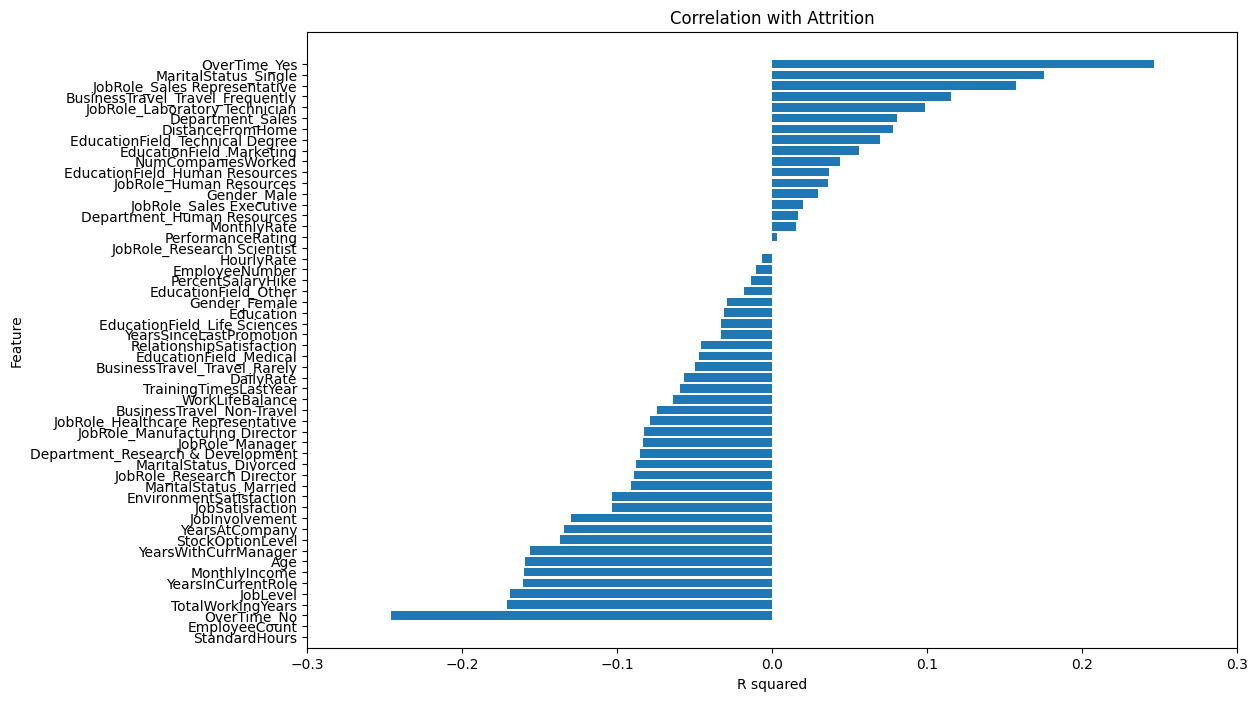

In [20]:
plt.figure(figsize=(12, 8))
plt.barh(correlation_to_attrition.index, correlation_to_attrition)
plt.gca().invert_yaxis()
plt.ylabel('Feature')
plt.xlabel('R squared')
plt.xlim(-0.3, 0.3)
plt.title('Correlation with Attrition')
plt.show()

In [21]:
top5_positive_features = list(correlation_to_attrition.head().index)
top5_negative_features = list(correlation_to_attrition.tail().index)

print(f'Top 5 positive related features: {top5_positive_features}')
print(f'Top 5 negative related features: {top5_negative_features}')


Top 5 positive related features: ['OverTime_Yes', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician']
Top 5 negative related features: ['TotalWorkingYears', 'OverTime_No', 'EmployeeCount', 'StandardHours', 'Over18_Y']


#### Visualize the relationship between some features and attrition

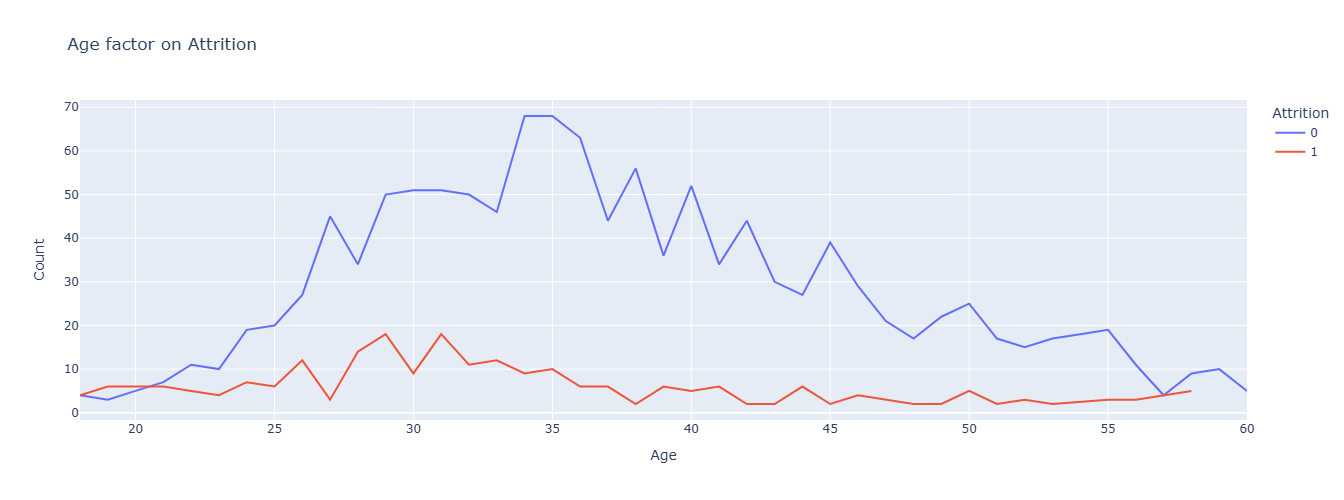

In [22]:
# How age affects attrition
df_age_attrition = df.groupby(['Age', 'Attrition'])['Age'].count().reset_index(name='Count')

fig = px.line(df_age_attrition,
              x='Age',
              y='Count',
              color='Attrition',
              title='Age factor on Attrition',
              width=800,
              height=500)
fig.show()

From the age 28 to 29, we can see a peak of employee attrition then get lower and lower. It means people after 29 tend to focus more on job stability  
From the age 18 to 19, there are more people leaving the company than staying.  
    People at this age tend to explore the job opportunity. Thus, attrition rate is relatively higher than retaining rate

  OverTime  Attrition  Count
0       No          0    944
1       No          1    110
2      Yes          0    289
3      Yes          1    127


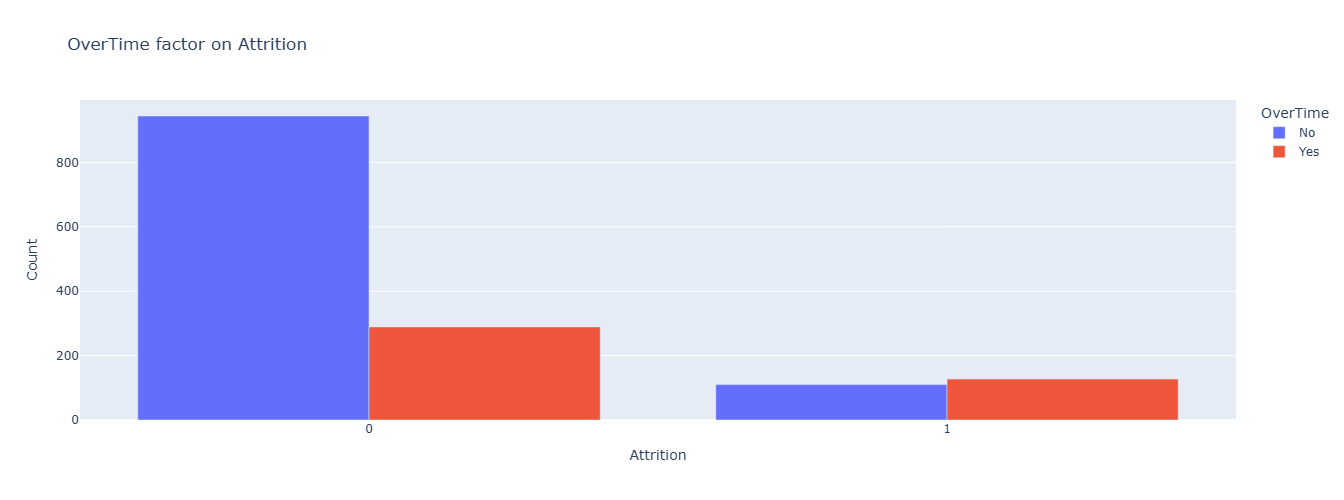

In [23]:
# How overtime affects attrition
df_overtime_attrition = df.groupby(['OverTime', 'Attrition'])['OverTime'].count().reset_index(name='Count')
print(df_overtime_attrition)
fig = px.bar(df_overtime_attrition,
             x='Attrition',
             y='Count',
             color='OverTime',
             barmode='group',
             width=500,
             height=500,
             title='OverTime factor on Attrition')
fig.show()

People with overtime has relatively higher chance to leave the company.  
    On the contrary, people tend to stay in the company when they do not overtime.

  MaritalStatus  Attrition  Count
0      Divorced          0    294
1      Divorced          1     33
2       Married          0    589
3       Married          1     84
4        Single          0    350
5        Single          1    120


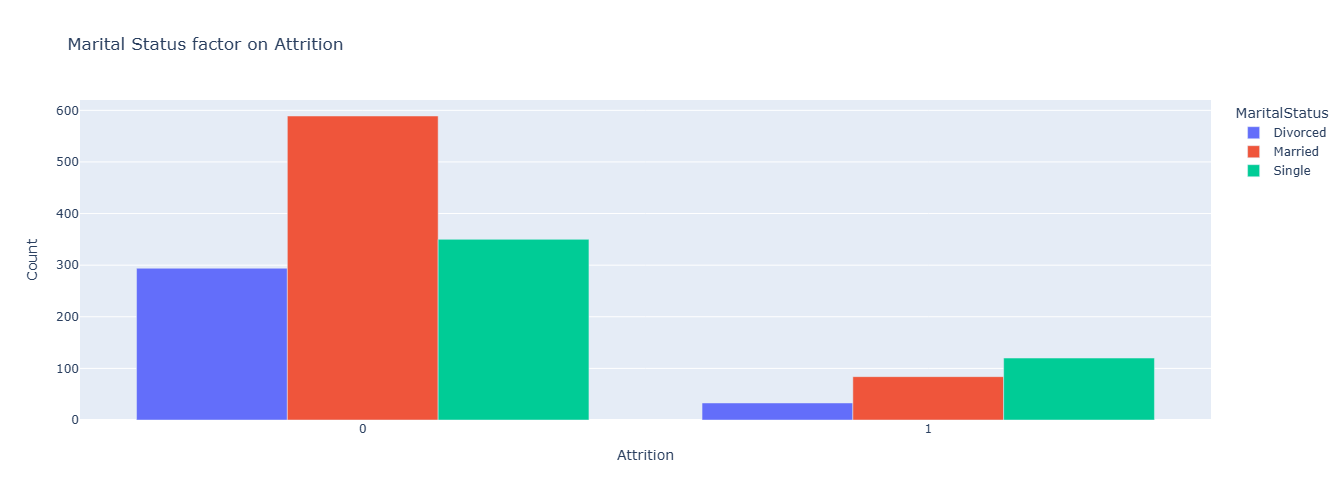

In [24]:
# How maritalstatus affects attrition
df_maritalstatus_attrition = df.groupby(['MaritalStatus', 'Attrition'])['MaritalStatus'].count().reset_index(name='Count')
print(df_maritalstatus_attrition)

fig = px.bar(df_maritalstatus_attrition,
             x='Attrition', 
             y='Count',
             color='MaritalStatus',
             barmode='group',
             width=500,
             height=500,
             title='Marital Status factor on Attrition')

fig.show()

People who are married tend to stay in the company since changing the job will bring uncertain factor to the family.  
On the contrary, single people do not have many restriction like family factor and has higher chance to leave company. 

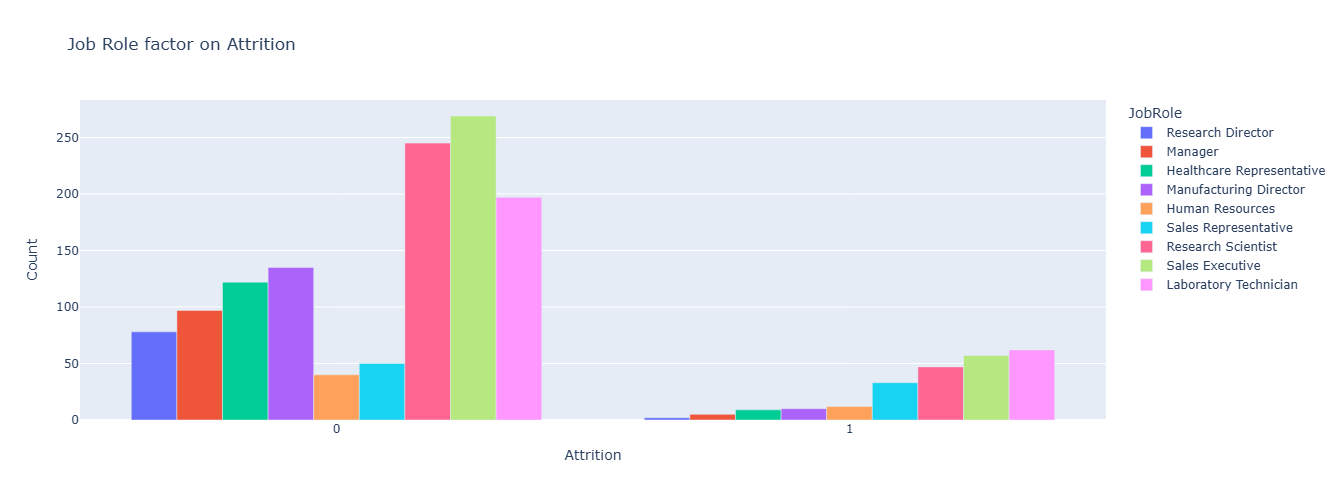

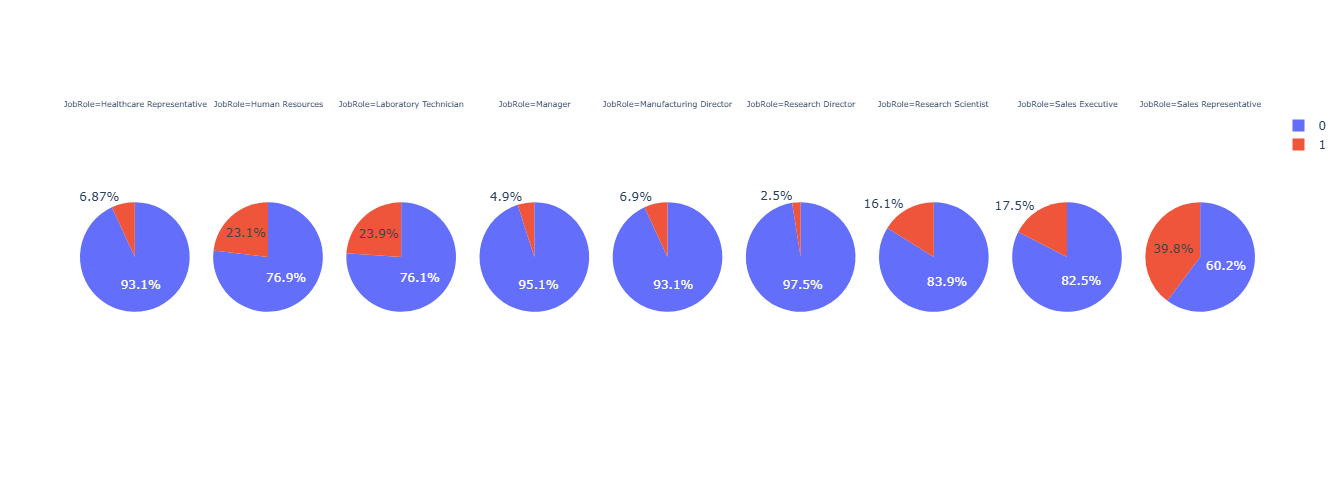

In [25]:
# How job role affects attrition
df_jobrole_attrition = df.groupby(['JobRole', 'Attrition'])['JobRole'].count().reset_index(name='Count')


fig1 = px.bar(df_jobrole_attrition,
                     x='Attrition',
                     y='Count',
                     color='JobRole',
                     barmode='group',
                     category_orders={'JobRole': df_jobrole_attrition.sort_values('Count')['JobRole']},
                     title='Job Role factor on Attrition',
                     width=500,height=500)

fig2 = px.pie(df_jobrole_attrition,
              names='Attrition',
              values='Count',
              facet_col='JobRole',
              width=1200,
              height=500)
fig2.for_each_annotation(lambda a: a.update(font=dict(size=8)))

fig1.show()
fig2.show()

Notice there are more people leaving company from Laboratory Technician, Sales Executive, and Research Scientist.  
    Mainly it is due to high population from those 3 groups.  
    Checking in ratio, sale representative has relatively high ratio of employee attrition.

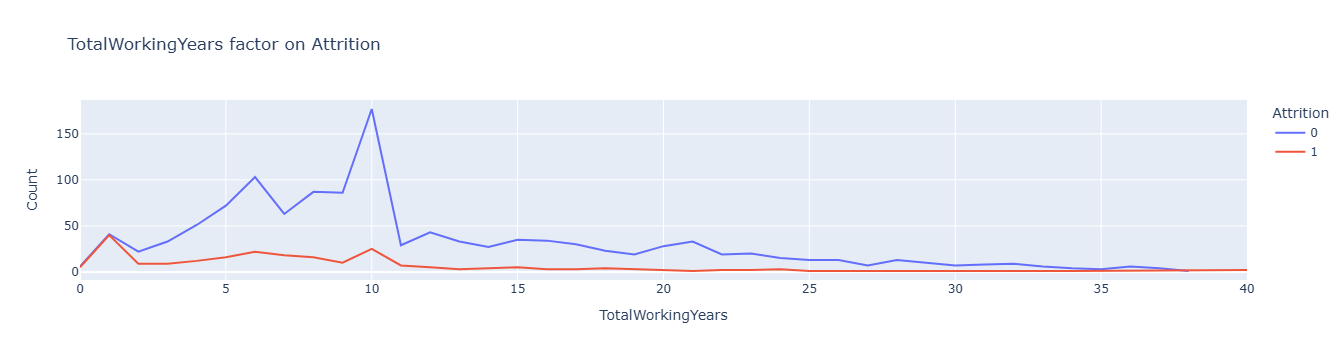

In [26]:
# How Total working year affect attrition
df_totalworkingyears_attrition = df.groupby(['TotalWorkingYears','Attrition'])['TotalWorkingYears'].count().reset_index(name='Count')
fig = px.line(df_totalworkingyears_attrition,
              x='TotalWorkingYears',
              y='Count',
              color='Attrition',
              title='TotalWorkingYears factor on Attrition')
fig.show()

There is high ratio of employee attrition when total working year is 1 year  
    Mostly, people tend to leave the company at the early stage of the company if they do not find it suitable.  
        There is another peak when total working years is 10 year. Probably people choose to leave the job for new opportunity after gaining enough experience.

#### Key Take-away from this section
- Positive related features (Positive R squared) means employees with these features tend to leave company (employee attrition=1)
  - OverTime
  - Single status
  - Job roles as Sales Representative or Lab technician
  - Frequent business travel
- Negative related features (Negative R squared) means emplpoyees with these features tend not to leave company (employee attrition=0)
  - High monthly income
  - High years in current role
  - High job level
  - High total working years
  - No overtime
- The target column is imbalanced. We need to balance the distribution when splitting
- Redundant features: EmployeeCount, StandardHours, Over18_Y, and EmployeeNumber
- Attrition column: Yes is 1 and No is 0
- Plotly visualizes how different feature factors with high correlation affect attrition

In [27]:
# Remove redundant features
df_feature_selection = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)
df_feature_selection

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


### Model Development
- Split into training data and test data
- Preprocess the dataframe
  - numerical features: Normalization
  - categorical features: convert into numeric data as we did at the last section
- Build the ML pipeline
  - Randon Forest Classification
  - Logistic Regression
  - XGboost Classification
- Grid search
- Evaluation
  - Classification report
  - Confusion matrix
- Feature importance analysis
- Attrition distribution

In [28]:
X = df_feature_selection.drop(columns='Attrition', axis=1)
y = df_feature_selection['Attrition']

#### Split into training data and test data to prevent data leakage

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(1029, 30)
(441, 30)
(1029,)


#### Streamline the preprocessing

In [30]:
X_numerical_features = X.select_dtypes(include='number').columns.tolist()
X_categorical_features = X.select_dtypes(include='object').columns.tolist()

numerical_transformer = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_numerical_features),
        ('cat', categorical_transformer, X_categorical_features)
    ]
)


#### Make the ML pipeline for random forest classification

In [31]:
# Compare the random forest classification with or without compute class weight
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])


#### Make grid search

In [32]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 3, 4, 5]
}

model = GridSearchCV(estimator=pipeline, cv=cv, param_grid=param_grid, scoring='accuracy', verbose=1)

#### Model training

In [33]:
model.fit(X_train, y_train)

print(f'The best parameter setting:\n{model.best_params_}')
print(f'The average score from the best parameter setting:\n{model.best_score_:.3f}')
print(f'The best model:\n{model.best_estimator_}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
The best parameter setting:
{'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
The average score from the best parameter setting:
0.875
The best model:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'Jo

#### Model evaluation

In [34]:
score_rf = model.score(X_test, y_test)
print(f'The accuracy score of random forest classification: {score_rf:.3f}')

y_pred_rf = model.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred_rf)
print(classification_report_rf)

The accuracy score of random forest classification: 0.839
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       370
           1       0.50      0.18      0.27        71

    accuracy                           0.84       441
   macro avg       0.68      0.57      0.59       441
weighted avg       0.80      0.84      0.81       441



#### Visualization of Model performance

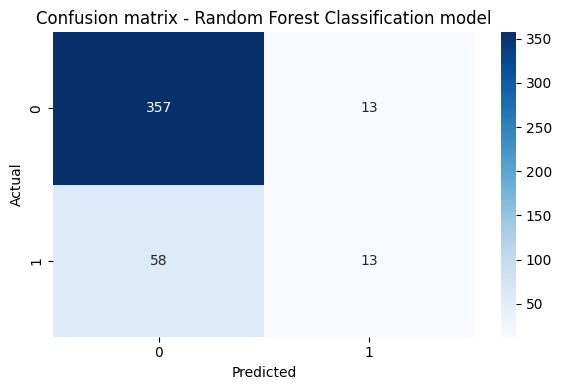

In [35]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - Random Forest Classification model')
plt.tight_layout()
plt.show()

Random Forest classification
- Good prediction performance when employees do not leave company
- Bad prediction performacne when employees do leave company

#### Feature Importance - Random forest classification

51


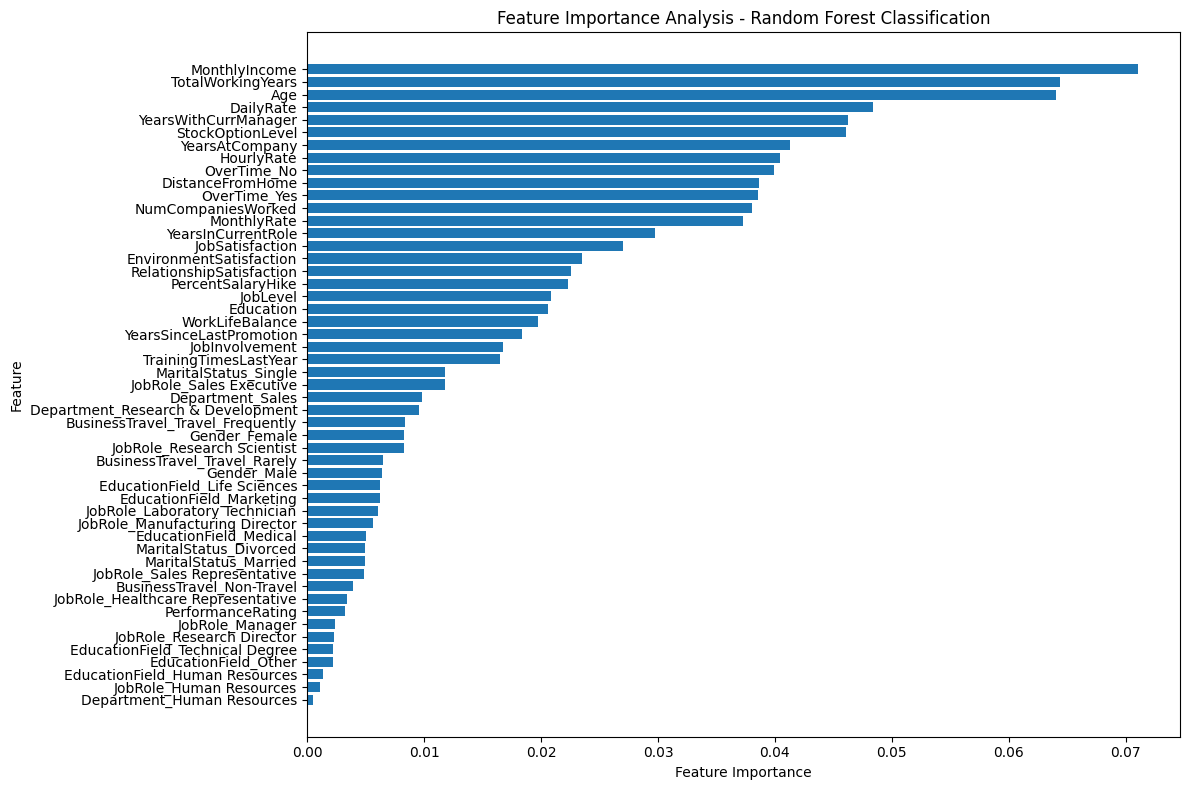

In [36]:
# Access the feature names
X_categorical_features_onehot = list(model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(X_categorical_features))
full_features = X_numerical_features + X_categorical_features_onehot
print(len(full_features))
# Access feature importance
feature_importances = model.best_estimator_['classifier'].feature_importances_

df_feature_importance = pd.DataFrame({
    'Feature': full_features,
    'Feature Importance': feature_importances
}).sort_values(by='Feature Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Feature Importance'])
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()
plt.title('Feature Importance Analysis - Random Forest Classification')
plt.tight_layout()
plt.show()

Feature importance analysis indicates which feature has more influence in classification prediction

#### Visualization - Attrition distribution per top_6 features and bot_6 features

In [37]:
# Get the x data after preprocessing
X_train_transform = model.best_estimator_['preprocessor'].transform(X_train)

df_transform_X = pd.DataFrame(X_train_transform, columns=full_features)

df_y = pd.DataFrame(y_train)
# print(df_y)
df_y = df_y.reset_index(drop=True)
# print(df_y)

df_transform = pd.concat([df_transform_X, df_y], axis=1)
df_transform

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,-1.958919,-0.413973,-0.036578,-0.866067,0.270496,-0.547908,0.378050,-0.998363,-1.538894,-0.867017,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,-0.430695,1.176070,0.699024,-1.835797,-0.651162,-0.449557,0.378050,0.846010,0.264662,1.532088,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,1.643324,1.296833,0.208623,1.073395,1.192155,0.829007,0.378050,-0.076177,0.264662,-0.737494,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,-1.085648,-0.549831,-0.894779,0.103664,1.192155,1.074884,0.378050,-0.998363,1.166440,-0.860942,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,-0.321536,-1.274408,-0.894779,1.073395,0.270496,0.484778,0.378050,-0.998363,0.264662,-0.936660,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,0.988370,0.841457,-0.281778,1.073395,0.270496,-1.728121,0.378050,-0.076177,0.264662,-0.279933,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1025,0.115099,0.501812,-0.894779,-0.866067,-0.651162,-1.678945,0.378050,-0.076177,-1.538894,0.074791,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1026,-1.631442,-1.490774,-0.159178,-1.835797,-0.651162,1.419113,-2.440885,-0.998363,-1.538894,-0.888930,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1027,-0.103218,-0.954890,-0.894779,1.073395,1.192155,0.386427,0.378050,-0.076177,-0.637116,0.089761,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [38]:
top6_feature = df_feature_importance.head(6)['Feature'].tolist()
for a, b in enumerate(top6_feature):
    print(a, b)

0 MonthlyIncome
1 TotalWorkingYears
2 Age
3 DailyRate
4 YearsWithCurrManager
5 StockOptionLevel


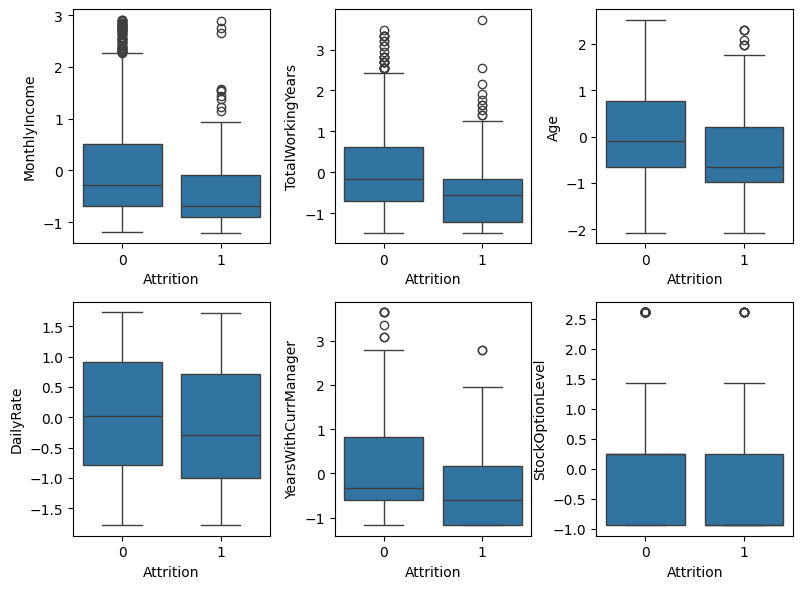

In [39]:
fig = plt.figure(figsize=(8, 6))
for p, i in enumerate(top6_feature):
    ax = fig.add_subplot(2, 3, p+1)
    sns.boxplot(x='Attrition', y=i, data=df_transform)
plt.tight_layout()
plt.show()

In [40]:
bot6_feature = df_feature_importance.tail(6)['Feature'].tolist()
for a, b in enumerate(bot6_feature):
    print(a, b)

0 JobRole_Research Director
1 EducationField_Technical Degree
2 EducationField_Other
3 EducationField_Human Resources
4 JobRole_Human Resources
5 Department_Human Resources


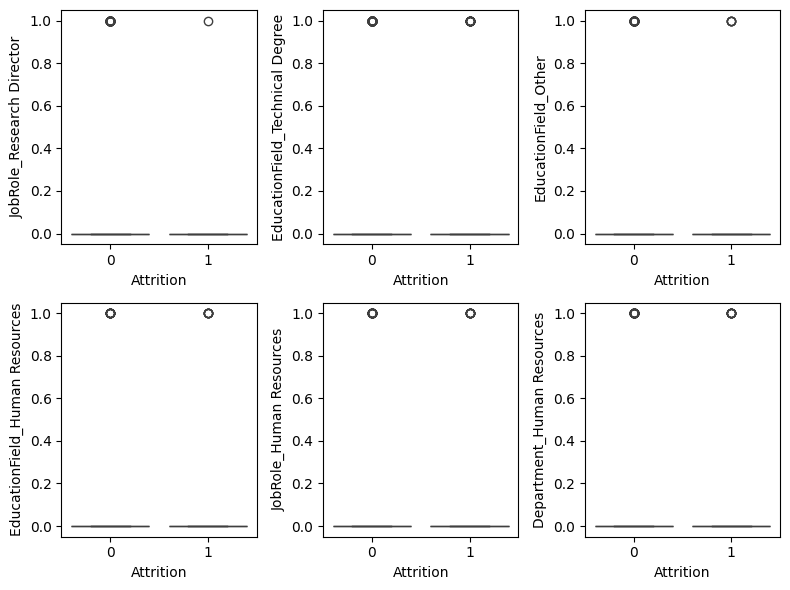

In [41]:
fig = plt.figure(figsize=(8, 6))
for p, i in enumerate(bot6_feature):
    ax = fig.add_subplot(2, 3, p+1)
    sns.boxplot(x='Attrition', y=i, data=df_transform)
plt.tight_layout()
plt.show()

### Model development - Logistic Regression

In [54]:
pipeline_lr = pipeline.set_params(classifier=LogisticRegression(class_weight='balanced', random_state=42))

model.estimator = pipeline_lr

param_grid_lr = {
    'classifier__penalty': ['l2', 'l1'],
    'classifier__solver': ['lbfgs', 'liblinear'],
    'classifier__max_iter': [100, 150, 200],
    'classifier__C': [0.5, 0.8, 1]
}


model.param_grid = param_grid_lr

model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\nanya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nanya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nanya\anaconda3\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\nanya\anaconda3\lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Us

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EnvironmentSatisfaction',
                                                                          'HourlyRate',
                                                                          'JobInvolvement',
                                                                          'JobLevel',
                                                                          'JobSatisfaction',
                                                                          'MonthlyIncome'...
                                                                         ['BusinessTravel',
                                                                          'Department',
                                                                          'EducationField',
                                                                          'Gender',
                                                                          'JobRole',
                                                                          'MaritalStatus',
                                                                          'OverTime'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.5, 0.8, 1],
                         'classifier__max_iter': [100, 150, 200],
                         'classifier__penalty': ['l2', 'l1'],
                         'classifier__solver': ['lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [43]:
print(f'The best parameter setting:\n{model.best_params_}')
print(f'The average score from the best parameter setting:\n{model.best_score_:.3f}')
print(f'The best model:\n{model.best_estimator_}')

The best parameter setting:
{'classifier__C': 0.5, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
The average score from the best parameter setting:
0.771
The best model:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                            

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       370
           1       0.39      0.70      0.50        71

    accuracy                           0.77       441
   macro avg       0.66      0.75      0.68       441
weighted avg       0.84      0.77      0.80       441



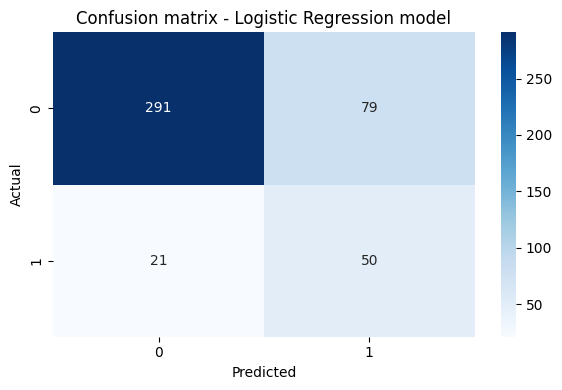

In [44]:
y_pred_lr = model.predict(X_test)
classification_report_lr = classification_report(y_test, y_pred_lr)
print(classification_report_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - Logistic Regression model')
plt.tight_layout()
plt.show()

#### Feature importance - Logistic Regression

51
[[-2.75892808e-01 -1.52362087e-01  2.82634771e-01  1.14731203e-02
  -3.45490324e-01 -8.50396673e-02 -2.54901015e-01  4.12661389e-01
  -3.76339868e-01 -3.99725902e-01  3.77780483e-02  4.56900868e-01
  -1.31052379e-01  5.17044093e-02 -3.25656026e-01 -2.02903632e-01
  -4.52679089e-01 -1.83738327e-01 -1.77018619e-01  0.00000000e+00
  -2.96600312e-01  5.61957764e-01 -2.75034235e-01 -7.88486840e-01
   7.01726664e-01  0.00000000e+00  0.00000000e+00 -8.58000788e-01
   0.00000000e+00  2.69961630e-01 -1.50653128e-01  7.31470574e-03
  -3.21800293e-02 -4.32813929e-01  1.00643240e-01 -3.41160833e-01
   4.56864904e-03 -2.92165719e-01  0.00000000e+00  1.16748062e+00
   0.00000000e+00  0.00000000e+00 -3.63666203e-01  0.00000000e+00
   2.29095051e-04  8.56663234e-01 -2.69375580e-01  0.00000000e+00
   6.25012099e-01 -9.39024290e-01  6.24543681e-01]]


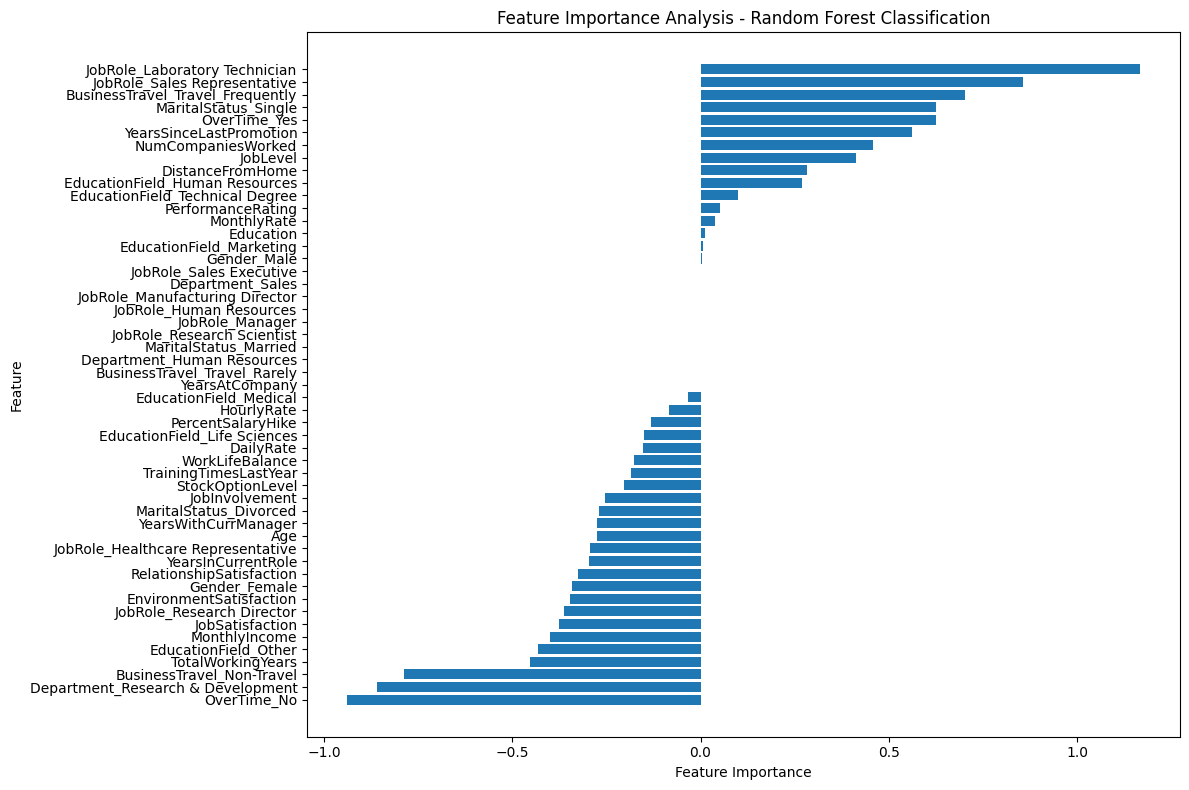

In [70]:
# Access the feature names
X_categorical_features_onehot = list(model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(X_categorical_features))
full_features = X_numerical_features + X_categorical_features_onehot
print(len(full_features))

# Access feature importance
feature_importances = model.best_estimator_['classifier'].coef_
print(feature_importances)

# Transform into dataframe
df_feature_importance = pd.DataFrame(feature_importances, columns=full_features)
df_feature_importance_transpose = df_feature_importance.transpose().reset_index()
df_feature_importance_transpose.columns = ['Feature', 'Feature Importance']
df_feature_importance_transpose = df_feature_importance_transpose.sort_values('Feature Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(df_feature_importance_transpose['Feature'], df_feature_importance_transpose['Feature Importance'])
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()
plt.title('Feature Importance Analysis - Random Forest Classification')
plt.tight_layout()
plt.show()

### Model development - XGBoost

In [71]:
pipeline_xgb = pipeline.set_params(classifier=XGBClassifier(random_state=42))

model.estimator = pipeline_xgb

param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 200, 500, 1000],
    'classifier__max_depth': [None, 5, 8, 10],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
}

model.param_grid = param_grid_xgb

model.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EnvironmentSatisfaction',
                                                                          'HourlyRate',
                                                                          'JobInvolvement',
                                                                          'JobLevel',
                                                                          'JobSatisfaction',
                                                                          'MonthlyIncome'...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'classifier__max_depth': [None, 5, 8, 10],
                         'classifier__n_estimators': [50, 100, 200, 500, 1000]},
             scoring='accuracy', verbose=1)

In [72]:
print(f'The best parameter setting:\n{model.best_params_}')
print(f'The average score from the best parameter setting:\n{model.best_score_:.3f}')
print(f'The best model:\n{model.best_estimator_}')

The best parameter setting:
{'classifier__learning_rate': 0.2, 'classifier__max_depth': 8, 'classifier__n_estimators': 200}
The average score from the best parameter setting:
0.882
The best model:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       370
           1       0.60      0.25      0.36        71

    accuracy                           0.85       441
   macro avg       0.74      0.61      0.64       441
weighted avg       0.83      0.85      0.83       441



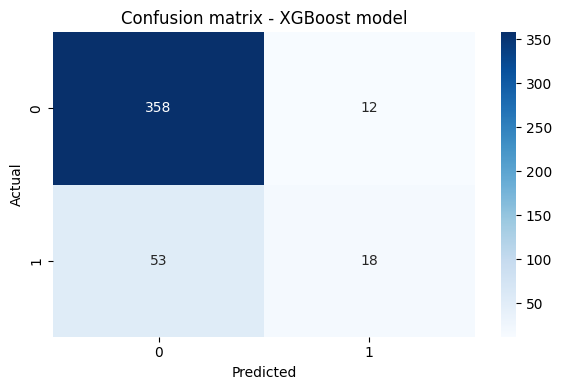

In [73]:
y_pred_xgb = model.predict(X_test)
classification_report_xgb = classification_report(y_test, y_pred_xgb)
print(classification_report_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - XGBoost model')
plt.tight_layout()
plt.show()

#### Feature importance - XGBoost

51


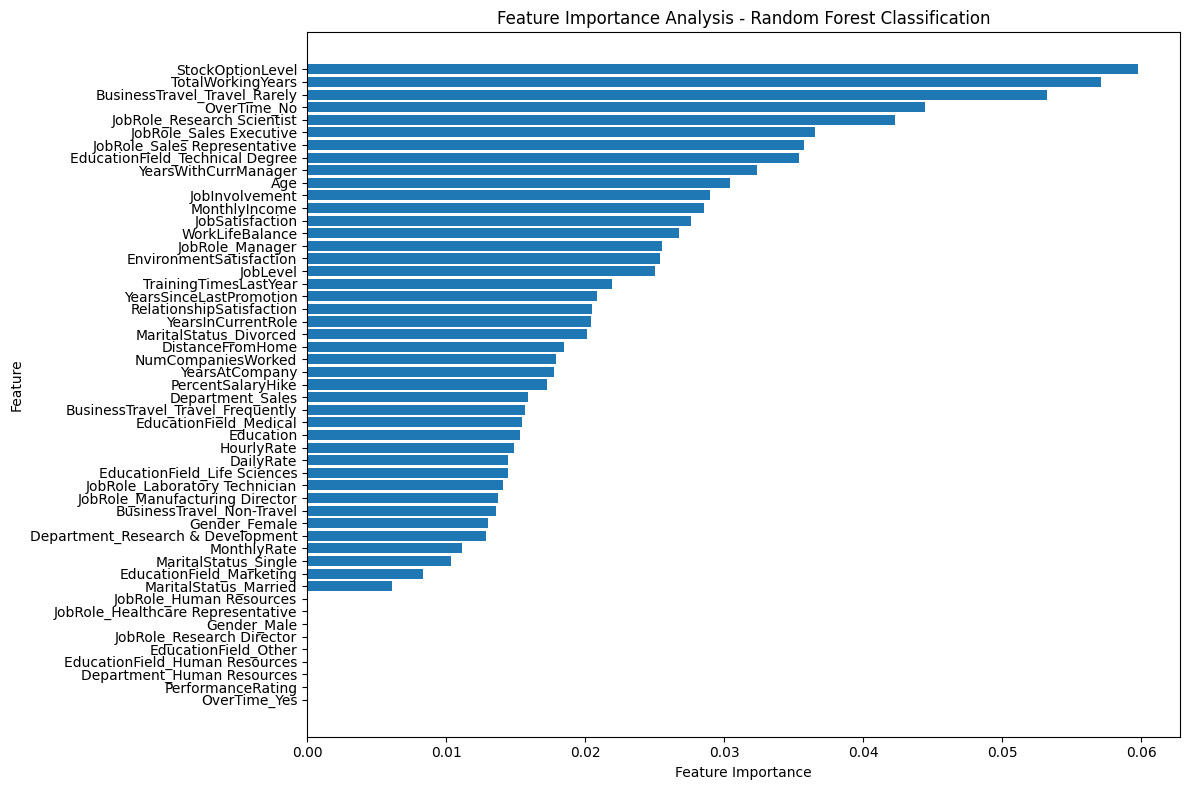

In [74]:
# Access the feature names
X_categorical_features_onehot = list(model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(X_categorical_features))
full_features = X_numerical_features + X_categorical_features_onehot
print(len(full_features))
# Access feature importance
feature_importances = model.best_estimator_['classifier'].feature_importances_

df_feature_importance = pd.DataFrame({
    'Feature': full_features,
    'Feature Importance': feature_importances
}).sort_values(by='Feature Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Feature Importance'])
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()
plt.title('Feature Importance Analysis - Random Forest Classification')
plt.tight_layout()
plt.show()

In [77]:
df_feature_importance.head()['Feature']

15                StockOptionLevel
16               TotalWorkingYears
25    BusinessTravel_Travel_Rarely
49                     OverTime_No
43      JobRole_Research Scientist
Name: Feature, dtype: object

### Model comparison

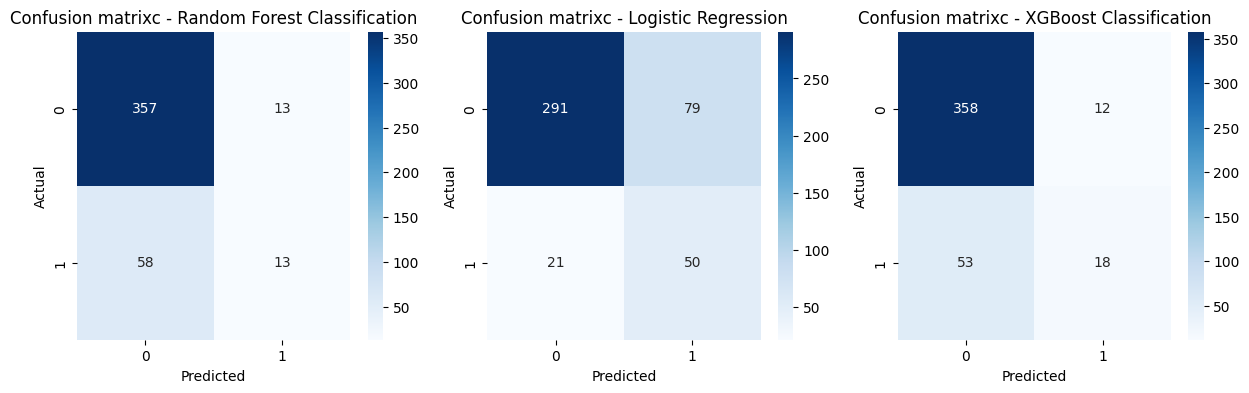

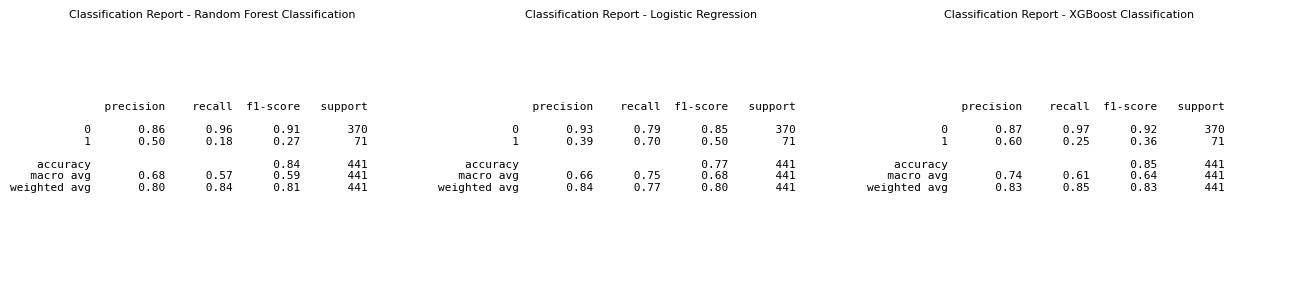

In [75]:
conf_matrix_list = [conf_matrix_rf, conf_matrix_lr, conf_matrix_xgb]
classification_report_list = [classification_report_rf, classification_report_lr, classification_report_xgb]
model_names = ['Random Forest Classification', 'Logistic Regression', 'XGBoost Classification']

fig_conf_matrix = plt.figure(figsize=(15, 4))


for i, conf, name in zip(range(1, 4), conf_matrix_list, model_names):
    ax = fig_conf_matrix.add_subplot(1, 3, i)
    sns.heatmap(conf, cmap='Blues', annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion matrixc - {name}')
'''
Same as
fig, axes = plt.subplots(1, 3, figsize=(15,4))

for ax, conf, name in zip(axes, conf_matrix_list, conf_matrix_names):
    sns.heatmap(conf, cmap='Blues', annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion matrixc - {name}')
'''

fig_classification_report, axes = plt.subplots(1, 3, figsize=(13, 3))

for ax, report, name in  zip(axes, classification_report_list, model_names):
    ax.text(0, 0.5,
            report,
            fontsize=8,
            ha='center',
            va='center', 
            family='monospace')
    ax.set_title(f'Classification Report - {name}', fontsize=8)
    ax.title.set_position((0.1, -0.5))
    ax.axis("off")

plt.tight_layout()
plt.show()

Take-away from model development and attrition prediction
- Random Forest classification and XGBoost have a good accuracy score around 85%. On the contrary, logistic regression has only 77% accuracy. The main reason can be that logisitc regression uses a linear model to do classification prediction, which is not capable of dealing with non-linear/complicated case as emplyee attrition. Looking at random forest classification and XGBoost, they use bagging and boosting technique respectively to improve variance and bias difference. What is more, they can deal with non-linear like this.
- Checking confusion matrix, random forest model and XGBoost make more true positive prediction than logistic regression. Compared between random forest model and XGBoost, XGBoost is preferred for attrition prediction since precision is higher (less FP and more true positive) and higher recall (Less FN)
- However, it seems better to choose logistic regression if the goal is to predict more employee attritionbut it is more likely to have false judgement

### Employee attrition prediction conclusion
- Understand the dataset and visualize the feature factor on employee attrition
- Correlation summary to understand which features have positive and negative effect with attrition, which is beneficial for exploration
  - Top5 Positive correlation: OverTime, Single status, Job roles as Sales Representative or Lab technician, and Frequent business travel
  - Top5 Negative correlation: High monthly income, High years in current role, High job level, High total working years, andNo overtime
- Build end-to-end ML pipeline including train test separation, preprocessing pipeline, hyperparameter tuning, cross validation, and evaluation
- Comparison between random forest classification, logistic regressionm, and XGBoost.
- With respect to the goal and mission, XGBoost will be the chosen as higher precision. Significant factors for employee attrition are stock option, total working years, business travel frequency, and overtime condition. 